In [1]:
# libs and dependancies
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import sem
import hvplot.pandas

In [2]:
# Read CSV into DF
job_data = pd.read_csv("../Resources/jobs_in_data.csv")
job_data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
# Group data by country and average salary
country_groupby = job_data.groupby("employee_residence")
country_avg_salary = round(country_groupby[['salary_in_usd']].mean(),2)
country_avg_salary

,salary_in_usd
employee_residence,
Algeria,100000.00
American Samoa,45555.00
Andorra,50745.00
Argentina,56444.44
Armenia,33500.00
...,...
United Arab Emirates,100000.00
United Kingdom,104920.30
United States,158586.13


In [4]:
# Count number of entries per country
country_resident_count = country_groupby[['salary_in_usd']].count()
country_resident_count = country_resident_count[(country_resident_count['salary_in_usd']>50)]
country_resident_count

,salary_in_usd
employee_residence,
Canada,224
France,54
Germany,66
Spain,117
United Kingdom,442
United States,8086


In [5]:
country_count_avg_salary = pd.merge(country_avg_salary, country_resident_count, on='employee_residence')
country_count_avg_salary = country_count_avg_salary.rename(columns={'salary_in_usd_x': 'Salary (USD)', 'salary_in_usd_y': 'Number of residents surveyed'})
country_count_avg_salary = country_count_avg_salary.reset_index()
country_count_avg_salary

,employee_residence,Salary (USD),Number of residents surveyed
0,Canada,144743.01,224
1,France,80700.78,54
2,Germany,97640.64,66
3,Spain,58084.94,117
4,United Kingdom,104920.30,442
5,United States,158586.13,8086


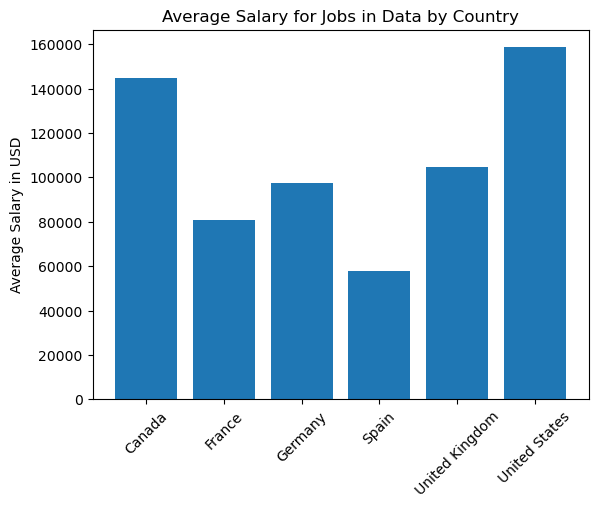

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot the data
x_value = country_count_avg_salary['employee_residence']
y_value = country_count_avg_salary['Salary (USD)']

plt.bar(x_value, y_value)
plt.ylabel('Average Salary in USD')
plt.title('Average Salary for Jobs in Data by Country')
plt.xticks(rotation=45)
plt.show()

# Save figure

plt.savefig('../Resources/country_avg_salary.png')